# Solution from Johannes Rieke and Alex Moore

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

### 1. Integration

In [2]:
from scipy.integrate import odeint

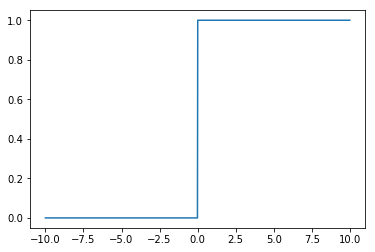

In [3]:
def step(x):
    return int(x >= 0)

x = np.linspace(-10, 10, 1000)
plt.plot(x, np.vectorize(step)(x))

In [52]:
def laing_chow(y, t, I1, I2, alpha=0.2, beta=0.4, phi=0.4, tau=20, g1=1, g2=1):
    u1, u2, a1, a2 = y
    du1 = -u1 + step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1)
    du2 = -u2 + step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2)
    da1 = 1 / tau * (-a1 + phi * step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1))
    da2 = 1 / tau * (-a2 + phi * step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2))
    return [du1, du2, da1, da2]
    

In [69]:
x0 = [1, 0, 0.1, 0.25]
t = np.linspace(0, 500, 10000)
I1 = 0.43
I2 = 0.5
u1, u2, a1, a2 = odeint(laing_chow, x0, t, args=(I1, I2)).T

In [70]:
def plot_results(u1, u2, a1, a2):
    plt.subplot(211)
    plt.plot(t, u1, label='u1')
    plt.plot(t, a1, label='a1')
    plt.grid()
    plt.xlim(0, 500)
    plt.legend()

    plt.subplot(212)
    plt.plot(t, u2, label='u2')
    plt.plot(t, a2, label='a2')
    plt.grid()
    plt.xlim(0, 500)
    plt.legend()
    plt.xlabel('t')

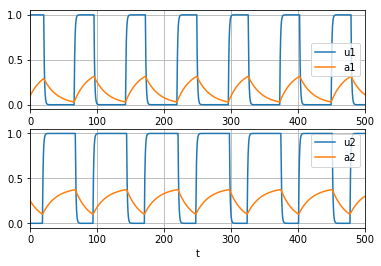

In [71]:
plot_results(u1, u2, a1, a2)

### 2. Dominance duration

In [63]:
def dominance_durations(x1, x2, t):
    durations = []
    start = None
    for X1, X2, T in zip(x1, x2, t):
        if start is None and X1 > X2:
            start = T
        elif start is not None and X1 < X2:
            durations.append(T - start)
            start = None
    if start is not None:  # population 1 active at the end of the simulation
        durations.append(t[-1] - start)
    return durations

In [64]:
dominance_durations(u1, u2, t)

[20.352035203520352,
 27.952795279527948,
 28.002800280027998,
 28.002800280027998,
 28.052805280528048,
 28.052805280528048,
 28.002800280027998]

Inserting the parameter values from above into eq. 9, one gets an analytical dominance duration of $T_1$ = 26.17. This is roughly in agreement with the simulated dominance durations (see above), but with a sligh deviation of ~2.

In [ ]:
# TODO: Why is this different from the simulation results?

### 3. Oscillation stop

With the parameter values from above, $- \alpha + \beta + \phi$ = 0.6.

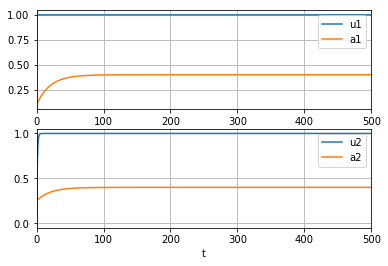

In [79]:
u1, u2, a1, a2 = odeint(laing_chow, x0, t, args=(0.8, 0.8)).T
plot_results(u1, u2, a1, a2)

The simulation confirms that for high inputs (here: 0.8), both populations are active and oscillation stops.

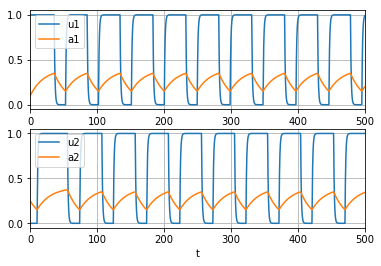

In [81]:
u1, u2, a1, a2 = odeint(laing_chow, x0, t, args=(0.55, 0.55)).T
plot_results(u1, u2, a1, a2)

In [77]:
dominance_durations(u1, u2, t)

[35.853585358535852,
 29.352935293529349,
 27.102710271027107,
 26.402640264026417,
 26.002600260025986,
 25.802580258025785,
 25.552555255525533,
 25.402540254025382,
 25.302530253025282,
 25.152515251525188]

For intermediate inputs (here: 0.55) the populations are inactive for shorter periods of time. Analytically, $T_1$ = 10.22. This deviates strongly from the simulated dominance durations (see above).

In [82]:
# TODO: Why the strong deviation?

## Exercise 2